# Wind Turbine Prediction

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [67]:
location1_path = 'Location1.csv'
location2_path = 'Location2.csv'
location3_path = 'Location3.csv'
location4_path = 'Location4.csv'
location1_data = pd.read_csv(location1_path)
location2_data = pd.read_csv(location2_path)
location3_data = pd.read_csv(location3_path)
location4_data = pd.read_csv(location4_path)

location1_data['Time'] = pd.to_datetime(location1_data['Time'])
location2_data['Time'] = pd.to_datetime(location2_data['Time'])
location3_data['Time'] = pd.to_datetime(location3_data['Time'])
location4_data['Time'] = pd.to_datetime(location4_data['Time'])

X_test_location3 = location3_data.drop(['Time', 'Power'], axis=1)
y_test_location3 = location3_data['Power']

X_test_location4 = location4_data.drop(['Time', 'Power'], axis=1)
y_test_location4 = location4_data['Power']

merged_data = pd.concat([location1_data, location2_data], ignore_index=True)

## Analysis

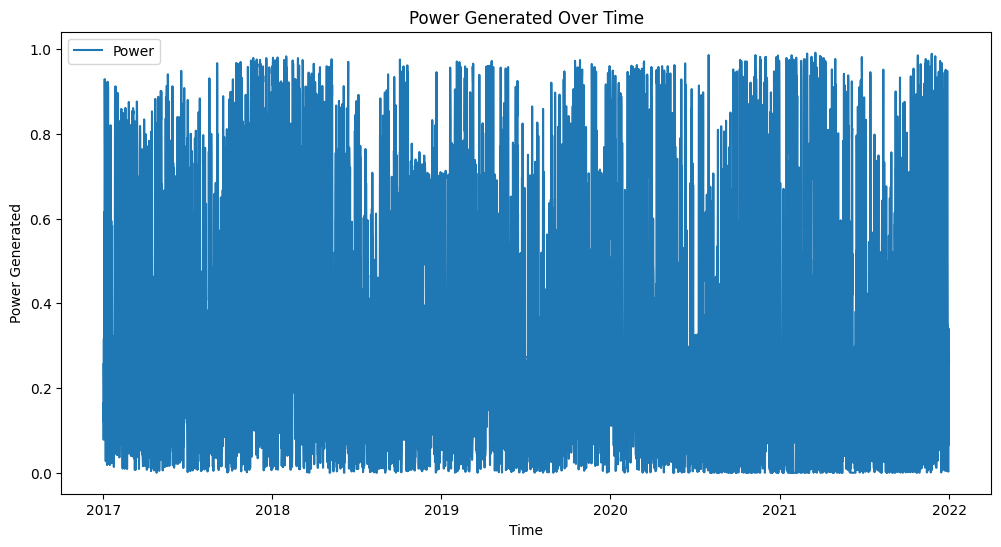

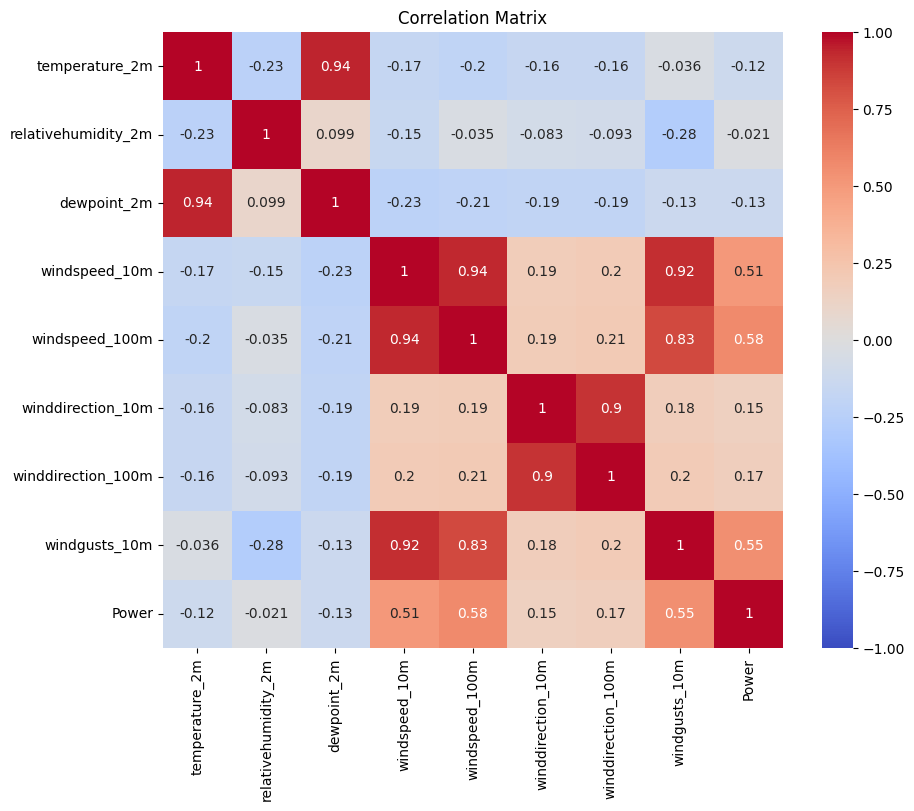

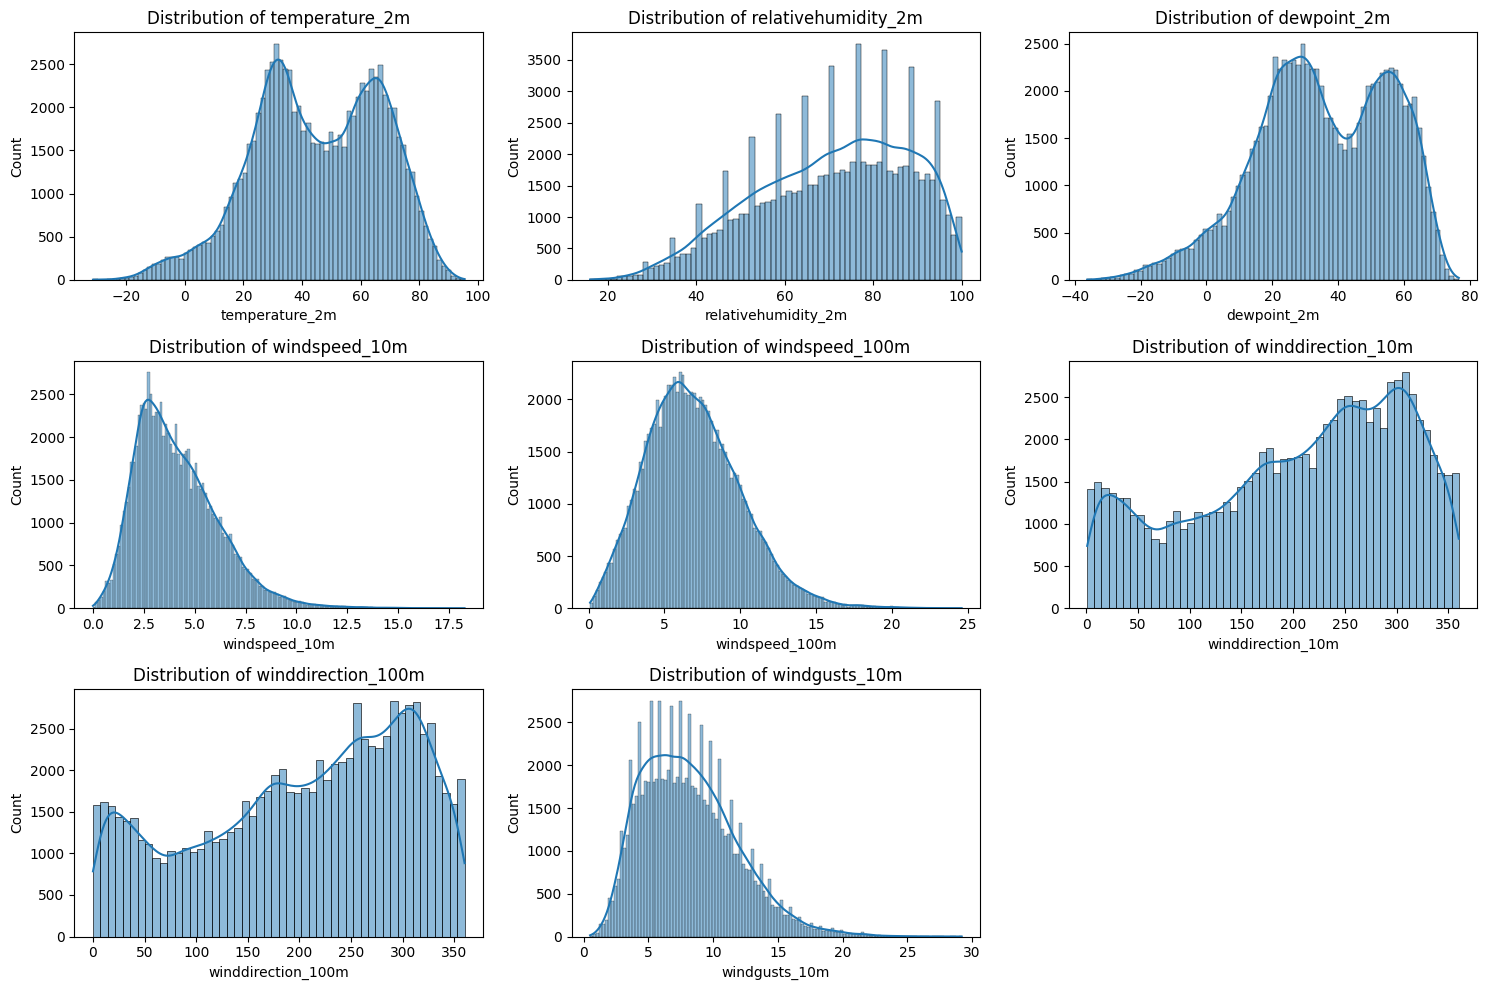

In [68]:
location1_path = 'Location1.csv'
location2_path = 'Location2.csv'
location1_data = pd.read_csv(location1_path)
location2_data = pd.read_csv(location2_path)

location1_data['Time'] = pd.to_datetime(location1_data['Time'])
location2_data['Time'] = pd.to_datetime(location2_data['Time'])

merged_data = pd.concat([location1_data, location2_data], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.plot(merged_data['Time'], merged_data['Power'], label='Power')
plt.xlabel('Time')
plt.ylabel('Power Generated')
plt.title('Power Generated Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = merged_data.drop(['Time'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

features = merged_data.drop(['Time', 'Power'], axis=1).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(merged_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Model Training

In [69]:
X = merged_data.drop(['Time', 'Power'], axis=1)
y = merged_data['Power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

early_stopping_callback = lgb.early_stopping(stopping_rounds=10, verbose=True)

num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data, test_data], callbacks=[early_stopping_callback])

model_filename = 'lightgbm_model.bin'
bst.save_model(model_filename)
print(f'Model saved to {model_filename}')

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[928]	training's rmse: 0.14559	valid_1's rmse: 0.163791
Model saved to lightgbm_model.bin


## Model Evaluation

RMSE on Location 3 test data: 0.22613372801507597
RMSE on Location 4 test data: 0.15550526409917642


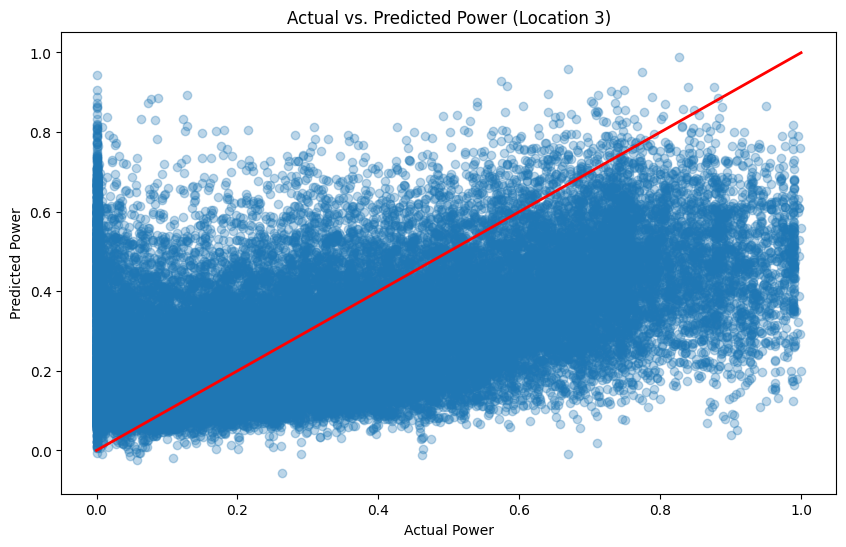

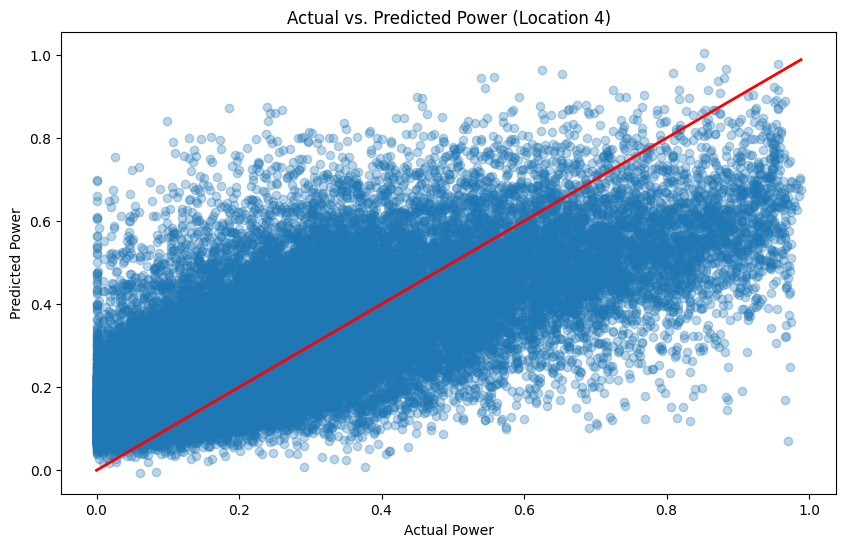

In [72]:
y_pred_location3 = bst.predict(X_test_location3, num_iteration=bst.best_iteration)
y_pred_location4 = bst.predict(X_test_location4, num_iteration=bst.best_iteration)

rmse_location3 = mean_squared_error(y_test_location3, y_pred_location3, squared=False)
rmse_location4 = mean_squared_error(y_test_location4, y_pred_location4, squared=False)
print(f'RMSE on Location 3 test data: {rmse_location3}')
print(f'RMSE on Location 4 test data: {rmse_location4}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test_location3, y_pred_location3, alpha=0.3)
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.title("Actual vs. Predicted Power (Location 3)")
plt.plot([y_test_location3.min(), y_test_location3.max()], [y_test_location3.min(), y_test_location3.max()], color='red', linewidth=2)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_location4, y_pred_location4, alpha=0.3)
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.title("Actual vs. Predicted Power (Location 4)")
plt.plot([y_test_location4.min(), y_test_location4.max()], [y_test_location4.min(), y_test_location4.max()], color='red', linewidth=2)
plt.show()

## Model Application

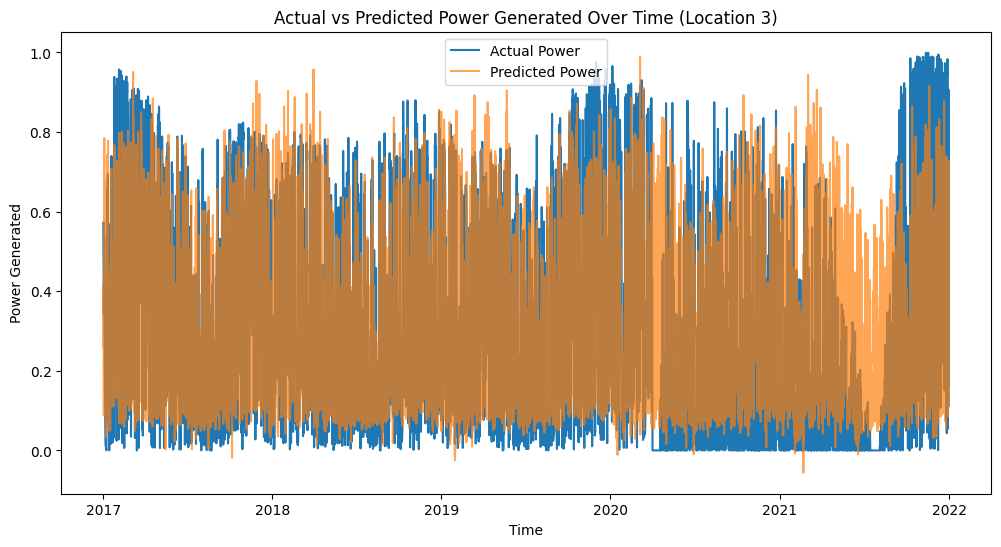

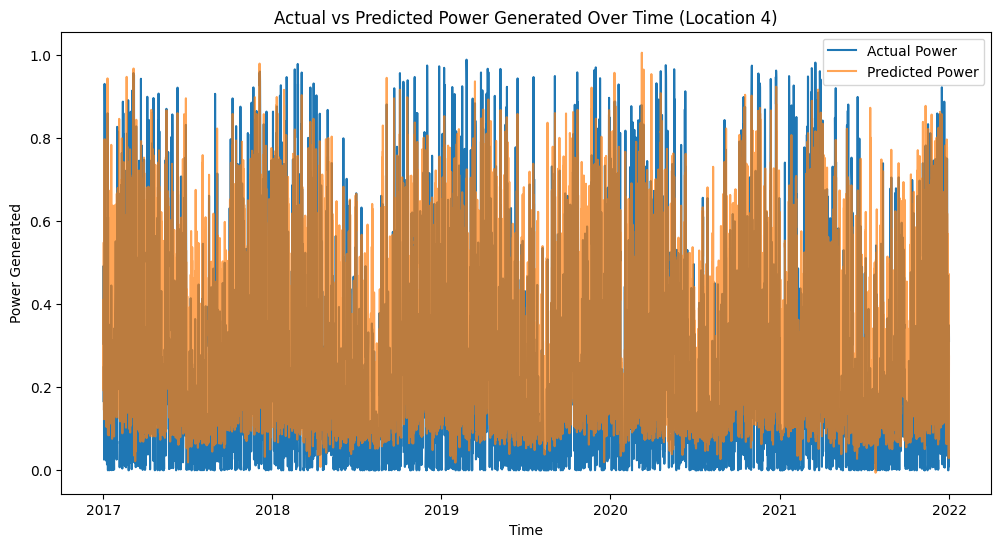

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(location3_data['Time'], y_test_location3, label='Actual Power')
plt.plot(location3_data['Time'], y_pred_location3, label='Predicted Power', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Power Generated')
plt.title('Actual vs Predicted Power Generated Over Time (Location 3)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(location4_data['Time'], y_test_location4, label='Actual Power')
plt.plot(location4_data['Time'], y_pred_location4, label='Predicted Power', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Power Generated')
plt.title('Actual vs Predicted Power Generated Over Time (Location 4)')
plt.legend()
plt.show()